I don't own the images in my notes

# Types of Hypothesis

__Null Hypothesis__
___
This is if nothing statistically important happens during a study. Meaning nothing new was found, that current methods still work how they are expected to or that new methods aren't doing anything of note. As a data scientist, you found nothing significant in your data from what is already present/known or useful/relevant regarding the business problem.

Example Scenario:

You are testing a new blood pressure drug but the results come back that there was no notable difference between patients that took the medicine vs patients that didn't. Similarly if you tested an already tested blood pressure drug under new conditions, but it still functions exactly or mostly the same as is already expected to.

__Alternate Hypothesis__
___
This is when our test indicate something of note was discovered, it proposes that something statistically significant was discovered. As a data scientist, we attempt to support these findings as it indicates something new was discovered regarding a pre-existing, or brand new, method or idea.

Example Scenario:

You tested the same new blood pressure drug but there was a notable difference between the test group vs the control group. Similarly, an already tested blood pressure drug reacted differently or showed new side effects under certain new conditions.



__Full Example Scenario__
___
We believe aliens have infiltrated us, but these aliens are much taller than humans.

We get human height data for our community.

Our belief is that there will be certain "humans" that are much taller than everyone else.

`Null Hypothesis`: Nobody is significantly taller than anyone else. Aliens are not present in our data.

`Alternate Hypothesis`: There are some "humans" that are much taller than everyone else. Aliens have infiltrated.

`Outcomes`: This is typically in terms of rejecting or accepting the null hypothesis. Either:

- "Reject" the null hypothesis, meaning we found something.
- "Fail to Reject" the null hypothesis, meaning we found nothing.

# Types of Errors

__Type 1 Errors__
___
Meaning to erroneously reject the null hypothesis.

Using the example above, we mistakenly qualify someone with above average height as an alien, but is actually a tall human.


__Type 2 Errors__
___
Meaning to erroneously fail to reject the null hypothesis.

Using the same example, we mistakenly qualify someone with average height as a human but is actually a short alien.

For any test, we must decide which type of error is worse.

__Alpha Level__
___
This helps us control which error we accept more and which error we account for more.

Main Use of Alpha Level:

- The higher the alpha level, the more likely we reject the null hypothesis (potentially higher type 1 errors).

- The lower the alpha level, the more likely we fail to reject the null hypothesis (potentially higher type 2 errors).

Changing this value is at the discretion of the researcher/data scientist. For example, medical researchers will set the alpha level to 0.05 which means there is a 5% probability of making a type 1 error.
> A 5% probability of erroneously rejecting the null hypothesis / a 5% probability of mistakenly supporting the alternate hypothesis / a 5% probability for a false positive.

While astrophysicist commonly use 0.001 which is a 0.1% chance for a type 1 error.

The lower the alpha level, the less likely you are to determine you have a meaningful result. In a sense, your test is more strict. Smaller alpha levels increase the chances that you will make a Type 2 Error and "miss" supporting the alternate hypothesis when it is true.

Considering your data and test, you might consult a subject matter expert (SME) and/or may select the alpha value depending on how problematic type 1 and type 2 errors would be. 

__P-Values__
___
This is a calculated probability. This helps us determine the validity of our statistically significant findings. 
- The lower the p-value, the more statistically significant any observed difference is.
- The higher the p-value, the less significant any observed difference is.

After 'p' is calculated it is compared to the alpha level.

- p < alpha level = We reject the null hypothesis and support the alternate.

- p > alpha level = We fail to reject the null hypothesis.

__Calculating P value using CDF__

In [3]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
# Example height data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
df.head()
males = df.loc[ df['Gender'] == 'Male'].copy()
females = df.loc[ df['Gender'] == 'Female'].copy()

In [5]:
# Important statistics
data = males['Height']
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

In [6]:
# Defining relevant range
# For our example we are concerned with 78 inches and higher
low_end = 78
high_end = max

In [7]:
# Define the range for our normal CDF
x_range = np.linspace(min, max, 1000)

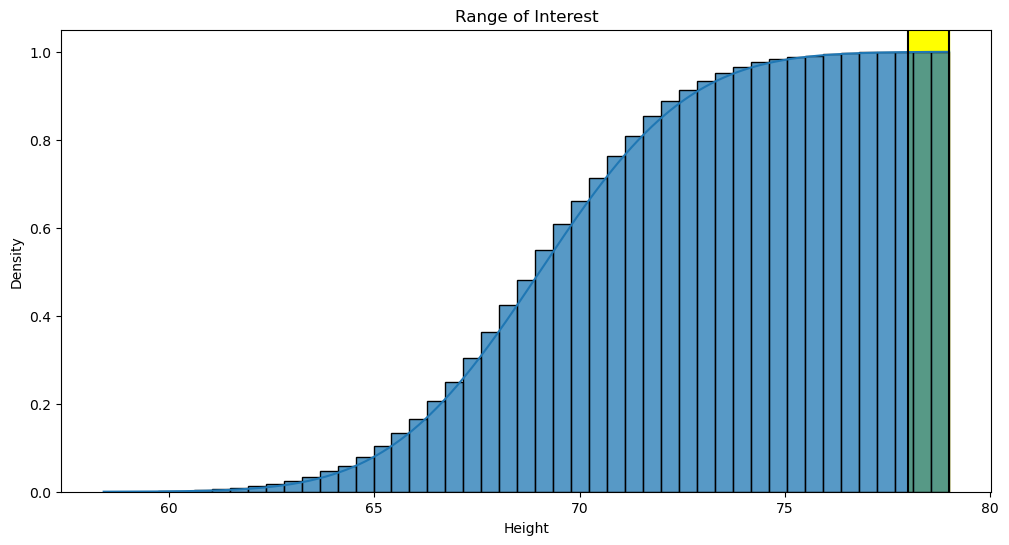

In [8]:
# Not always necessary when doing your own but here is a visualization
# Of the portion of the data we are currently concerned with
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range,cdf)
ax.axvline(low_end, color= 'black')
ax.axvline(high_end, color ='black')
ax.axvspan(low_end, high_end, color ='yellow', zorder = 0)
ax.set_title('Range of Interest');

In [9]:
# Now that everything is ready, we can do the calculations
# to get the probability of 78 inches OR TALLER get the 
# cumulative sum of 78 inches OR TALLER in our data
# Reminder: when getting GREATER THAN we subtract 1
# In the parentheses, min target value, loc = mean of relevant column/feature
# scale = standard deviation of relevant column/feature

1 - stats.norm.cdf(78, loc = np.mean(data), scale = np.std(data))

0.000861409975311811

__Interpreting Calculation__
___
There is a probability of .00086 (or a 0.086% chance) that a human male would have a height equal to or taller than our potential alien.

We then compare the p-value with the alpha level

For our example we are using an alpha level of 0.05.

Is p-value less than or greater than the alpha level?
> 0.00086 < 0.05

Since the p-value is less than alpha level, any observation of an above average height can be reliably identified as an alien. Meaning we can trust the results and any positive observations are in fact statistically significant.

# Checking for Normalcy
___
__Normality Test__

In [10]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [11]:
# We are using movie data from 2000-2020
## Load the data
movie_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRzwOVZswzLMacwVwQJLB4WnDZIy46gxMxZzGtJs0FKCLhwXDb8kUI1wmo9-Nll0oo1EpgjFbBoUEV/pub?output=csv"
df = pd.read_csv(movie_url,index_col=0,parse_dates=['release_date'])
## Filter out movie population of interest and remove nulls
## keeping only movies released after 2000 and before 2020
df = df[(df['release_date'] > "2000") & (df['release_date'] <"2020")]
df = df.dropna(subset=['runtime'])
df.head(3)

belongs_to_collection    budget  \
id                                                                
1   [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
2   [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
3                                                 NaN   3300000   

                                               genres  \
id                                                      
1                      [{'id': 35, 'name': 'Comedy'}]   
2   [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
3                       [{'id': 18, 'name': 'Drama'}]   

                             homepage    imdb_id original_language  \
id                                                                   
1                                 NaN  tt2637294                en   
2                                 NaN  tt0368933                en   
3   http://sonyclassics.com/whiplash/  tt2582802                en   

                              original_title  \
id                                             
1                     Hot Tub Time Machine 2   
2   The Princess Diaries 2: Royal Engagement   
3                                   Whiplash   

                                             overview  popularity  \
id                                                                  
1   When Lou, who has become the "father of the In...    6.575393   
2   Mia Thermopolis is now a college graduate and ...    8.248895   
3   Under the direction of a ruthless instructor, ...   64.299990   

                         poster_path  ... release_date runtime  \
id                                    ...                        
1   /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg  ...   2015-02-20    93.0   
2   /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg  ...   2004-08-06   113.0   
3   /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg  ...   2014-10-10   105.0   

                            spoken_languages    status  \
id                                                       
1   [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2   [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3   [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                              tagline  \
id                                                      
1   The Laws of Space and Time are About to be Vio...   
2   It can take a lifetime to find true love; she'...   
3     The road to greatness can take you to the edge.   

                                       title  \
id                                             
1                     Hot Tub Time Machine 2   
2   The Princess Diaries 2: Royal Engagement   
3                                   Whiplash   

                                             Keywords  \
id                                                      
1   [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
2   [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
3   [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   

                                                 cast  \
id                                                      
1   [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
2   [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
3   [{'cast_id': 5, 'character': 'Andrew Neimann',...   

                                                 crew   revenue  
id                                                               
1   [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651  
2   [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435  
3   [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000  

[3 rows x 22 columns]

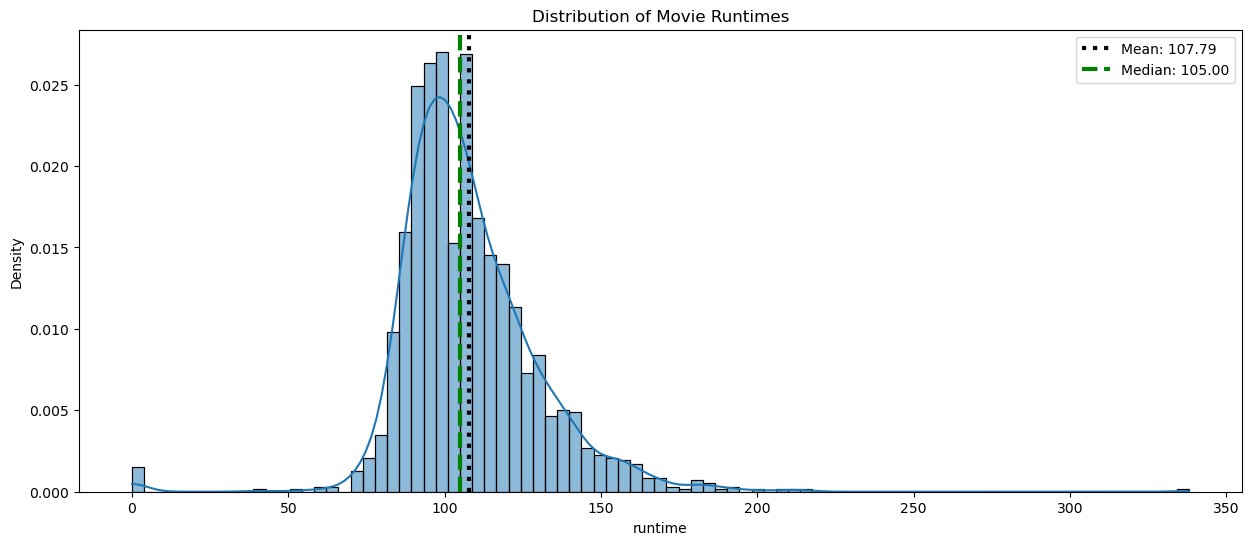

In [13]:
# Visualizing the distribution of our movies runtime times

## Slice out data and calc stats
data = df['runtime'].copy()
mean = np.mean(data)
med = np.median(data)
## Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=data, kde=True, ax=ax, stat='density')
ax.set_title('Distribution of Movie Runtimes')
## Annotate mean and median
ax.axvline(mean,ls=':', color='black', lw=3, label =f"Mean: {mean:.2f}")
ax.axvline(med,ls='--', color='green', lw=3, label =f"Median: {med:.2f}")
ax.legend();

Our data looks not normal but let's check. We can confirm this using a D’Agostino and Pearson’s Normality Test

`scipy.stats.normaltest`

In [14]:
# Remebere "data" was previously defined as df['runtime'].copy()

results = stats.normaltest(data)
print(results)

# Is p-value < alpha level?
results.pvalue < 0.05

NormaltestResult(statistic=498.6206359702571, pvalue=5.319914071356255e-109)


True

The p value is in scientific notation but is represents a very small number, much smaller than 0.05

But how do we interpret this?

"This function tests the null hypothesis that a sample comes from a normal distribution." According to scipy.stats.normaltest documentation

A p-value less than 0.05 says our distribution is significantly different than a normal distribution.  As suspected from the visual analysis, our distribution IS NOT normal.

If the p-value was greater than the alpha level (0.05 in this case) then that would mean our data IS normal.

# Sampling

In statistics and hypothesis testing, it is very important distinguishing when we are using ALL our data or a SUBSET of our data.

A `population` represents all the data we have. The metrics you obtain when using a population are called parameters, and are represented by Greek symbols.

A `sample` is a random subset of the population. The metrics you obtain when working with a sample are called statistics and are denoted by English letters

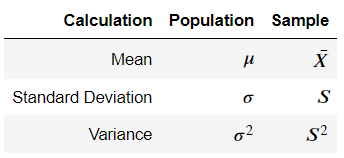

It is important to realize that samples may not be representative of the larger population they were sampled from, so we must be cautious when making inferences based only on the sample.

In [15]:
# We will be using the same movie data as earlier
# The following is just repition of the earlier code

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# Load the data
movie_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRzwOVZswzLMacwVwQJLB4WnDZIy46gxMxZzGtJs0FKCLhwXDb8kUI1wmo9-Nll0oo1EpgjFbBoUEV/pub?output=csv"
df = pd.read_csv(movie_url,index_col=0,parse_dates=['release_date'])


# Filter out movie population of interest and remove nulls
# keeping only movies released after 2000 and before 2020
df = df[(df['release_date'] > "2000") & (df['release_date'] < "2020")]
df = df.dropna(subset=['runtime'])
df.head(3)

belongs_to_collection    budget  \
id                                                                
1   [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
2   [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
3                                                 NaN   3300000   

                                               genres  \
id                                                      
1                      [{'id': 35, 'name': 'Comedy'}]   
2   [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
3                       [{'id': 18, 'name': 'Drama'}]   

                             homepage    imdb_id original_language  \
id                                                                   
1                                 NaN  tt2637294                en   
2                                 NaN  tt0368933                en   
3   http://sonyclassics.com/whiplash/  tt2582802                en   

                              original_title  \
id                                             
1                     Hot Tub Time Machine 2   
2   The Princess Diaries 2: Royal Engagement   
3                                   Whiplash   

                                             overview  popularity  \
id                                                                  
1   When Lou, who has become the "father of the In...    6.575393   
2   Mia Thermopolis is now a college graduate and ...    8.248895   
3   Under the direction of a ruthless instructor, ...   64.299990   

                         poster_path  ... release_date runtime  \
id                                    ...                        
1   /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg  ...   2015-02-20    93.0   
2   /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg  ...   2004-08-06   113.0   
3   /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg  ...   2014-10-10   105.0   

                            spoken_languages    status  \
id                                                       
1   [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2   [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3   [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                              tagline  \
id                                                      
1   The Laws of Space and Time are About to be Vio...   
2   It can take a lifetime to find true love; she'...   
3     The road to greatness can take you to the edge.   

                                       title  \
id                                             
1                     Hot Tub Time Machine 2   
2   The Princess Diaries 2: Royal Engagement   
3                                   Whiplash   

                                             Keywords  \
id                                                      
1   [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
2   [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
3   [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   

                                                 cast  \
id                                                      
1   [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
2   [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
3   [{'cast_id': 5, 'character': 'Andrew Neimann',...   

                                                 crew   revenue  
id                                                               
1   [{'credit_id': '59ac067c92514107af02c8c8', 'de...  12314651  
2   [{'credit_id': '52fe43fe9251416c7502563d', 'de...  95149435  
3   [{'credit_id': '54d5356ec3a3683ba0000039', 'de...  13092000  

[3 rows x 22 columns]

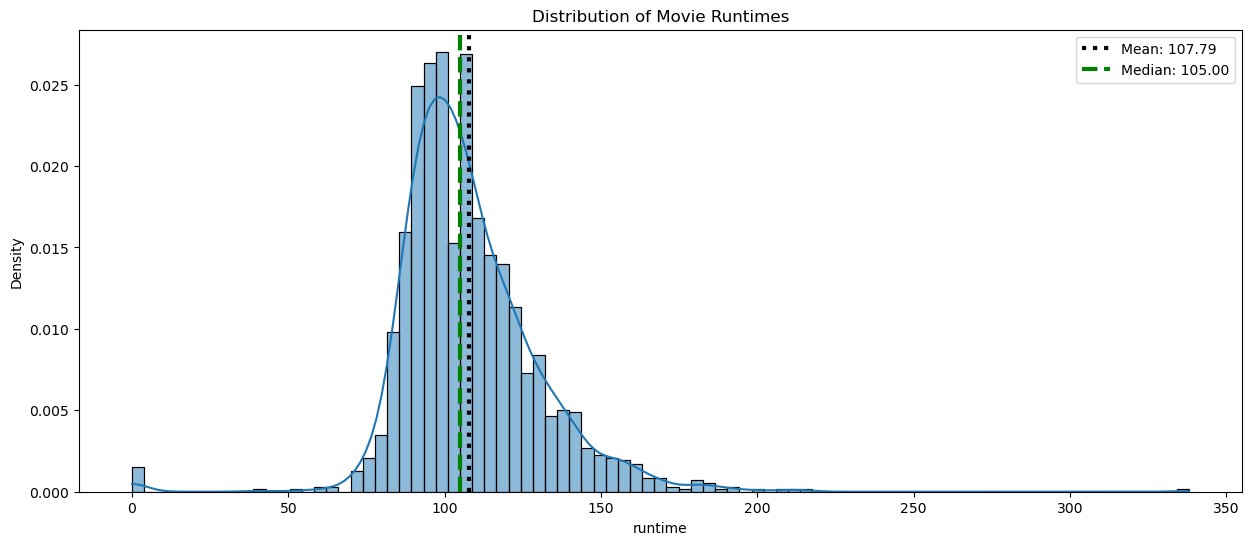

In [16]:
# This is just visualizing the spread of our data
# Specifically df['runtime']

# Slice out data and calc stats
data = df['runtime'].copy()
mean = np.mean(data)
med = np.median(data)


# Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=data,kde=True,ax=ax,stat='density')
ax.set_title('Distribution of Movie Runtimes')


# Annotate mean and median
ax.axvline(mean,ls=':', color='black', lw=3, label =f"Mean: {mean:.2f}")
ax.axvline(med,ls='--', color='green', lw=3, label =f"Median: {med:.2f}")
ax.legend();

We already checked for normalcy in this data previously,(this data is NOT normal) I will now check for normal distribution of a sample.

In [23]:
np.random.seed(32)
n = 20
## sampling 20 values from data without replacement
sample = np.random.choice(data, size=n, replace=False)
sample

array([125.,  87., 120.,  88., 121.,  90., 125., 109., 106., 165., 100.,
       107.,  91., 107., 129., 132., 100., 132.,  82., 107.])

In [24]:
# calculate stats
sample_mean = np.mean(sample)
sample_med = np.median(sample)
sample_std = np.std(sample)

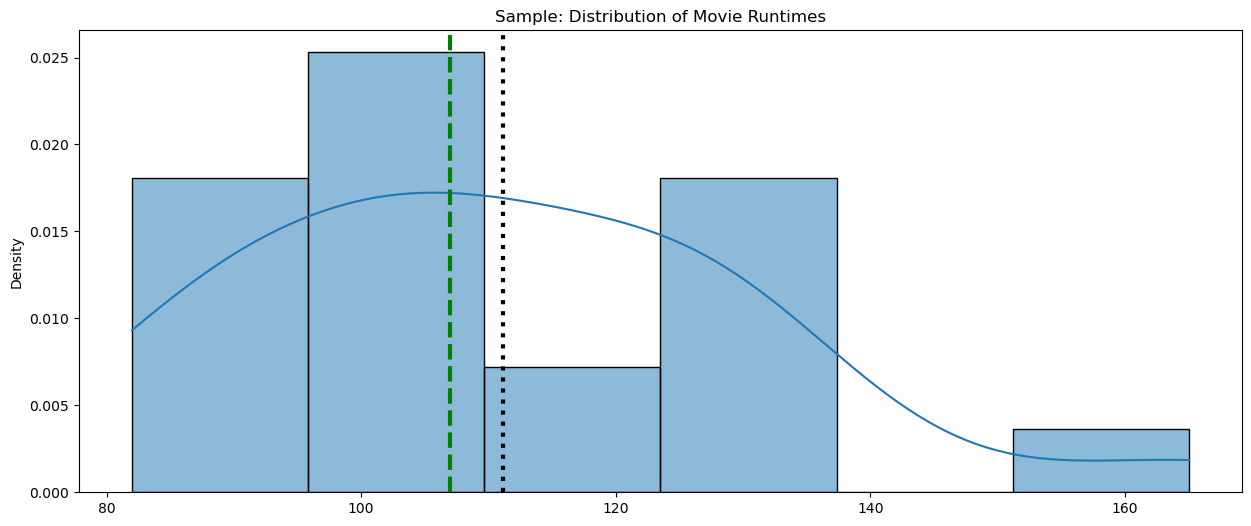

In [25]:
# Visualize the spread of the new sample

# Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=sample,kde=True,ax=ax,stat='density')
ax.set_title('Sample: Distribution of Movie Runtimes')


# Annotate mean and median
ax.axvline(sample_mean, ls=':', color='black', lw=3, label =f"Mean: {sample_mean:.2f}")
ax.axvline(sample_med,ls='--', color='green', lw=3, label =f"Median: {sample_med:.2f}")

In [26]:
# Normality Test

result = stats.normaltest(sample)
print(result)
result.pvalue < .05

NormaltestResult(statistic=3.879444116188468, pvalue=0.14374389667857196)


False

According to the normality test, this data IS normal despite the population we took this sample from IS NOT normal. Avoid making greater assumptions for the population using samples of the data.

__Do we have ALL the data?__
___
It can be difficult to truly optain ALL the data for what we need, but there are ways to make our samples much more aligned with the population. Enough to be more trustworthy, much more than the example above.

Some strategies include `larger sample size` and/or `multiple samples`.

In [32]:
# We will repeat the sample example we did above but make it much larger than 20
# We will try 100 instead

np.random.seed(32)
n = 100

# sampling 100 values from data without replacement
sample = np.random.choice(data, size=n, replace=False)


# calc stats
samp_mean = np.mean(sample)
samp_med = np.median(sample)
samp_std = np.std(sample)


#Set the range and spacing for the x-axis
x_range = np.linspace( np.min(data), np.max(data), num=10000)


#Define x scale, mean and std for the normal curve to be plotted
pdf = stats.norm.pdf(x_range, loc=np.mean(data),
                     scale = np.std(data))

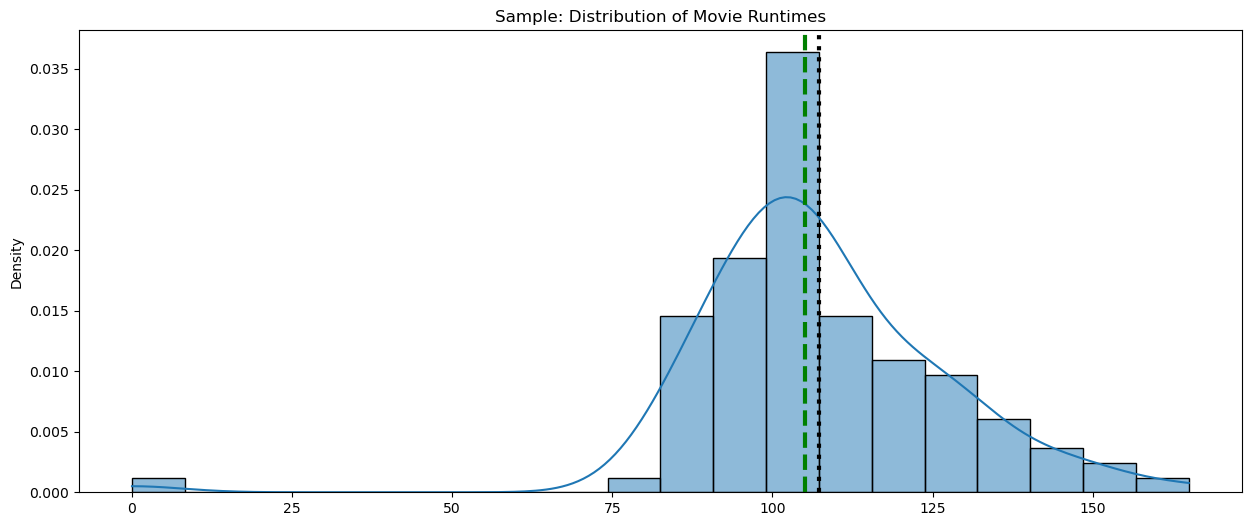

In [33]:
# Visualize the spread of the new sample

# Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,6))
sns.histplot(x=sample,kde=True,ax=ax,stat='density')
ax.set_title('Sample: Distribution of Movie Runtimes')


# Annotate mean and median
ax.axvline(samp_mean, ls=':', color='black', lw=3, label =f"Mean: {samp_mean:.2f}")
ax.axvline(samp_med,ls='--', color='green', lw=3, label =f"Median: {samp_med:.2f}")

We can already start to see than the distribution is looking similar to the original, although much much negatively skewed.

In [37]:
# Normality Test

results = stats.normaltest(sample)
print(results)

results.pvalue < 0.05

NormaltestResult(statistic=37.233728564765755, pvalue=8.218613776872242e-09)


True

Notice that our larger sample's mean (107.24) and median (105) are MUCH closer to the population mean(107.79) and median(105.0.) than our small sample.

Although this says this is a normal distribution despite the original not being normal

# Central Limit Theorem

__Note__: Normality is a key assumption for parametric tests which are more powerful and easier to interpret than non-parametric tests. When we start doing hypothesis testing, we will want to be able to use parametric tests when possible.

__Central Limit Theorem__
___
A `distribution made of sample means` approximates a normal distribution, even if the distribution of the original population is NOT normal. 

Due to the `central limit theorem`, as long as our population is large enough (greater than 30), we can take advantage of tests that assume a normal distribution.

__Sample Means__
___
In very basic terms, we take multiple samples of a population, each sample has its own mean, we get the mean for each sample and save it into a list.

The list we just made is called `distribution of sample means`. We can study this list to get a normal distribution based on the population we can use for our parametric tests even though the original population data IS NOT normal

In [38]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [39]:
# We will first make a fake population

#choose values between 1-1000, choose 5000 values
np.random.seed(42)
uniform = np.random.uniform(1, 1000, 5000)

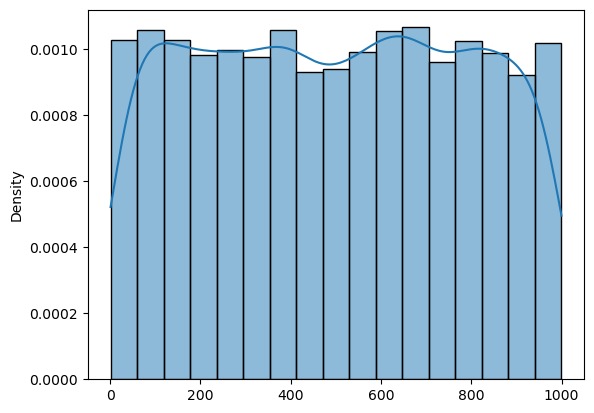

In [40]:
# Let's graph the density plot
sns.histplot(x=uniform,stat='density', kde=True);

In [41]:
# This is obviously not a normal distribution
# Let's make our sample means list

# Prepare the list and loop
np.random.seed(42)
sample_means = []

# loop to take 1000 samples of 30 and calculate the means of each sample
for i in range(1000):    
  sample = np.random.choice(uniform,size=30,replace=False)    
  sample_means.append( np.mean(sample))


# Print the first 5 sample means
sample_means[0:5]

[369.4808932208104,
 555.6072958462468,
 507.2136853427085,
 449.9927701766231,
 530.2748285204503]

Even viewing just the first 5, we can see the variety in the mean for each of the samples looped through.

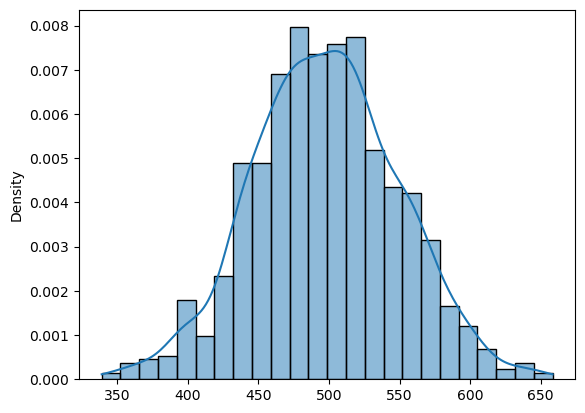

In [42]:
# visualize the sample means
sns.histplot(sample_means,kde=True,stat='density');

In [43]:
# Normalt test
stats.normaltest(sample_means)

NormaltestResult(statistic=0.14786790715227197, pvalue=0.9287330313111472)

0.92 is greater than 0.05 so the distribution of sample means IS normal.

This is a powerful theorem that allows us as data scientist to find normal distributions as long as the population is large enough.